The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Successfully loaded state dictionary from: /project/project_465001111/ct_clip/models/CT-CLIP_v2.pt
Validation size: 1
Evaluation started
occlusion visualization started.
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
artist figure None
a

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x14f6c81d85e0> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'NoneType' object has no attribute 'canvas'

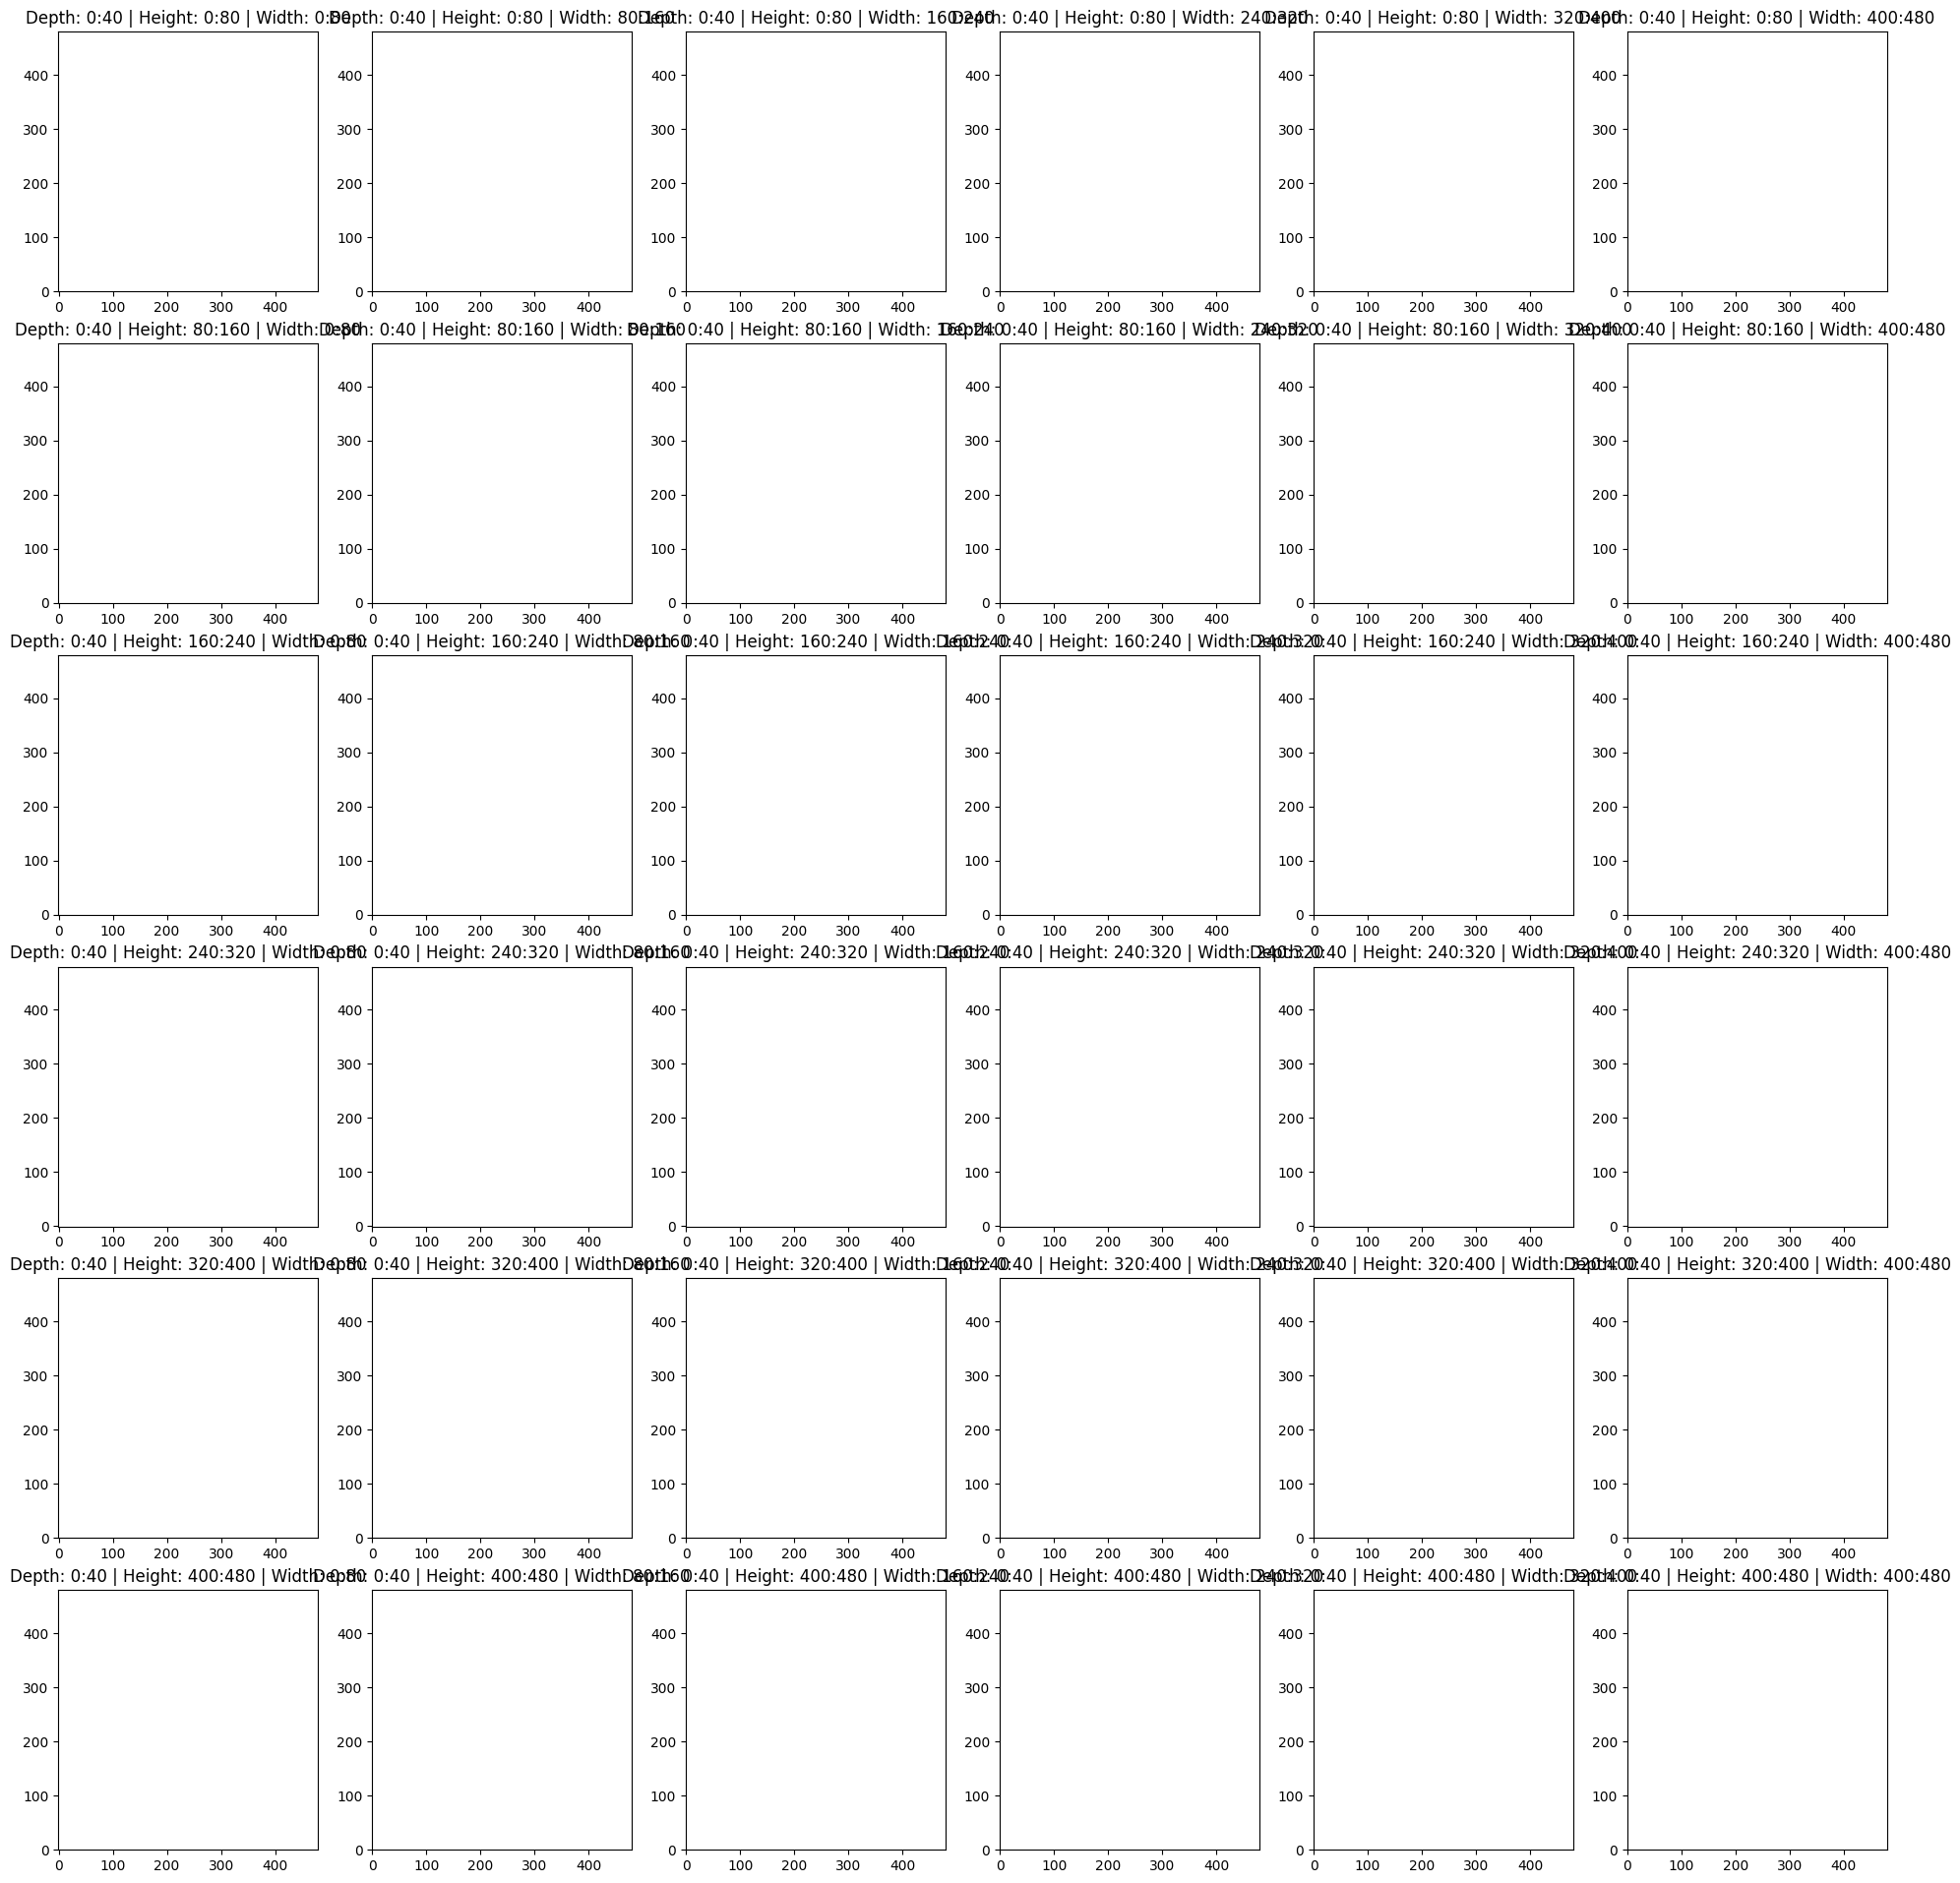

In [16]:
%load_ext autoreload
%autoreload 2

import warnings
import torch
import utils.CTClipInference
from monai.utils import ensure_tuple_rep
from models.ctclip import CTCLIP
from utils.ctvit import CTViT
from transformers import BertTokenizer, BertModel
from transformers.utils import logging
from torch import nn

warnings.simplefilter("ignore")
logging.set_verbosity_error()
torch.set_printoptions(profile="default")
torch.autograd.set_detect_anomaly(False)

tokenizer = BertTokenizer.from_pretrained('microsoft/BiomedVLP-CXR-BERT-specialized', do_lower_case=True)
text_encoder = BertModel.from_pretrained("microsoft/BiomedVLP-CXR-BERT-specialized")
text_encoder.resize_token_embeddings(len(tokenizer))

dim_latent = 512
dim_text = 768
vit_dim_image = 294912

vit_encoder = CTViT(
    dim = 512,
    codebook_size = 8192,
    image_size = 480,
    patch_size = 20,
    temporal_patch_size = 10,
    spatial_depth = 4,
    temporal_depth = 4,
    dim_head = 32,
    heads = 8
)

clip = CTCLIP(
    text_encoder = text_encoder,
    image_encoder = vit_encoder,
    dim_text = dim_text,
    dim_image = vit_dim_image,
    dim_latent = dim_latent
)

clip.load("/project/project_465001111/ct_clip/pretrained_models/ctclip_v2.pt")

inference = utils.CTClipInference.CTClipInference(
    clip,
    valid_reports = "/project/project_465001111/ct_clip/CT-CLIP-UT/reports/valid_reports.csv",
    data_valid = "/scratch/project_465001111/ct_clip/data_volumes/dataset/valid",
    valid_labels = "/project/project_465001111/ct_clip/CT-CLIP-UT/labels/valid_labels.csv",
    valid_metadata = "/project/project_465001111/ct_clip/CT-CLIP-UT/metadata/valid_metadata.csv",
    results_folder = "/project/project_465001111/ct_clip/CT-CLIP-UT/src/results/valid/ctclip",
    batch_size = 1,
    num_workers = 4,
    num_valid_samples = 1,
    zero_shot = False,
    visualize = True
)

inference.infer()